In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import  seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('brain_stroke.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [5]:
df.shape

(4981, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [7]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [8]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [10]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 5)
df['bmi'] = imputer.fit_transform(df[['bmi']])

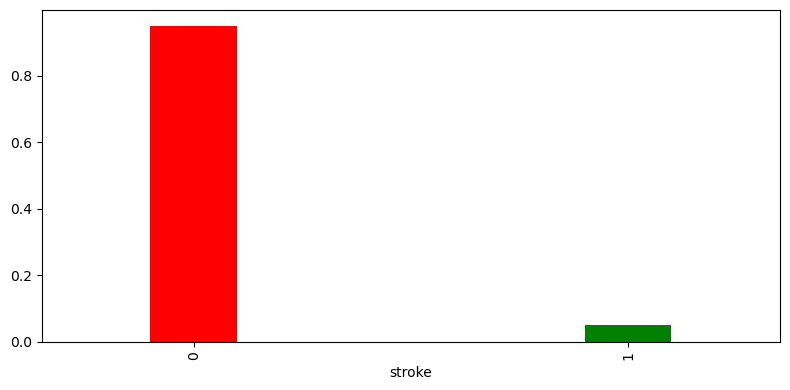

In [11]:
fig, axes = plt.subplots(figsize=(8,4))
df['stroke'].value_counts(normalize = True).plot.bar(width=0.2, color= ('red','green'))
                                                                        
plt.tight_layout()
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


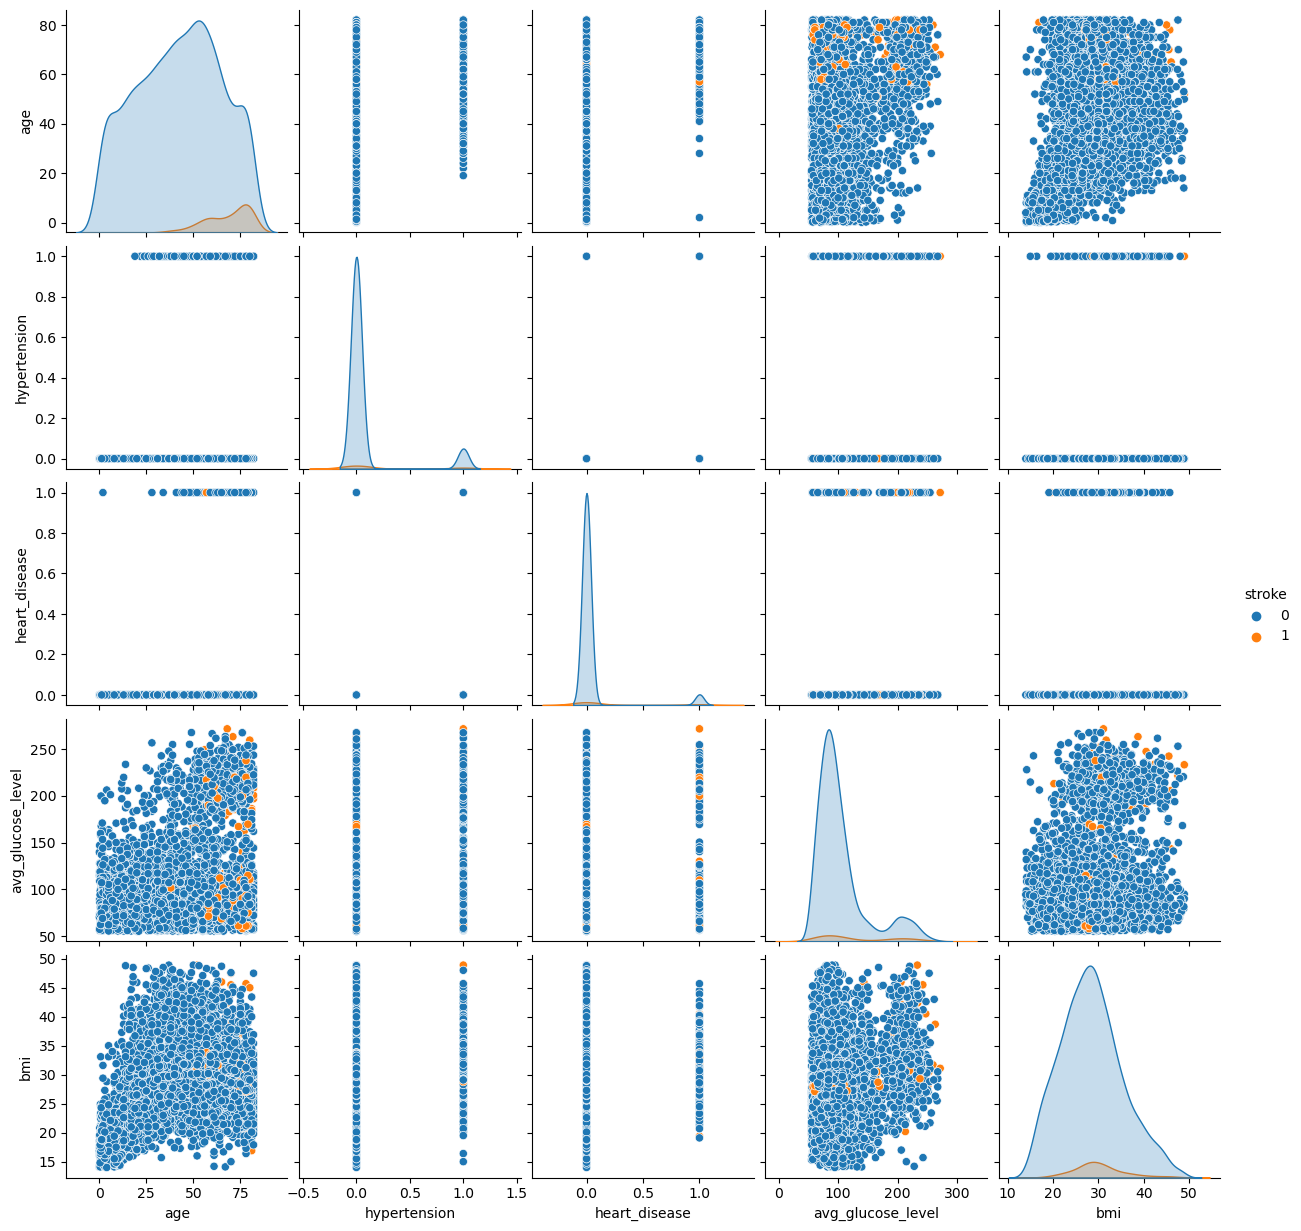

In [12]:
sns.pairplot(df, hue='stroke')

AttributeError: module 'matplotlib.pyplot' has no attribute 'subtitle'

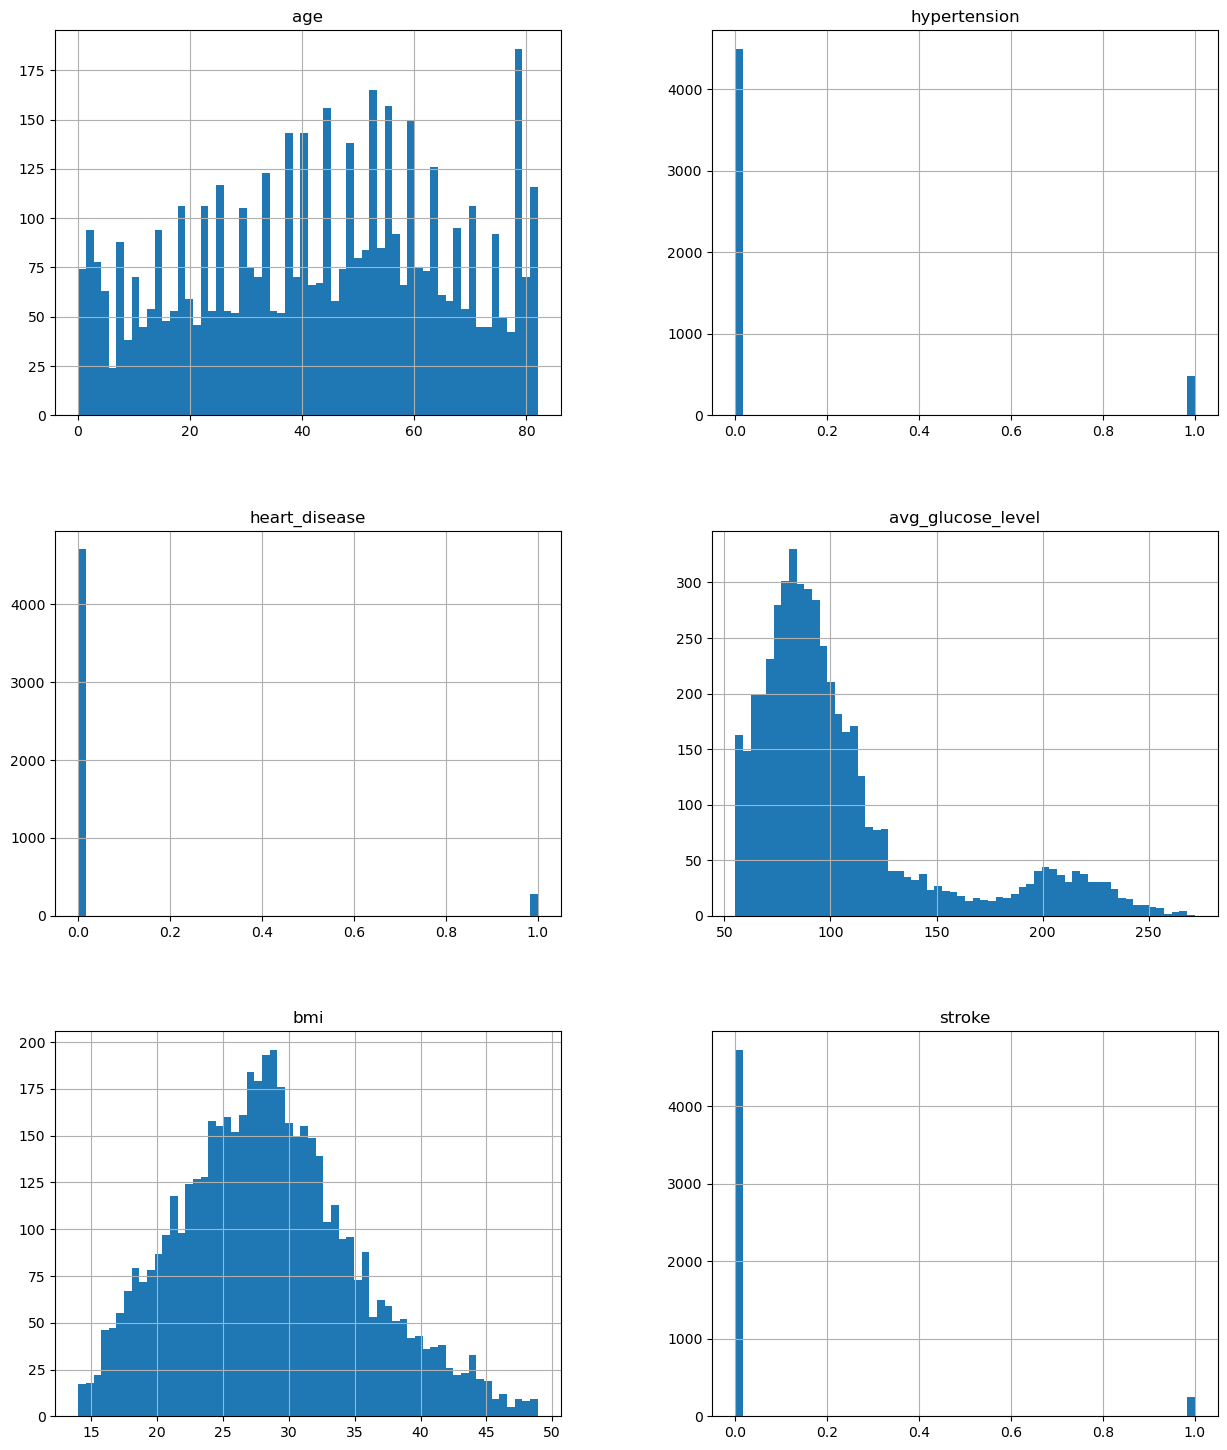

In [13]:
df.hist(figsize=(15,18),bins=60)

plt.subtitle('Features Distribution', x=0.5,y=1.02,ha='center',fontsize='large')

plt.tight_layout()

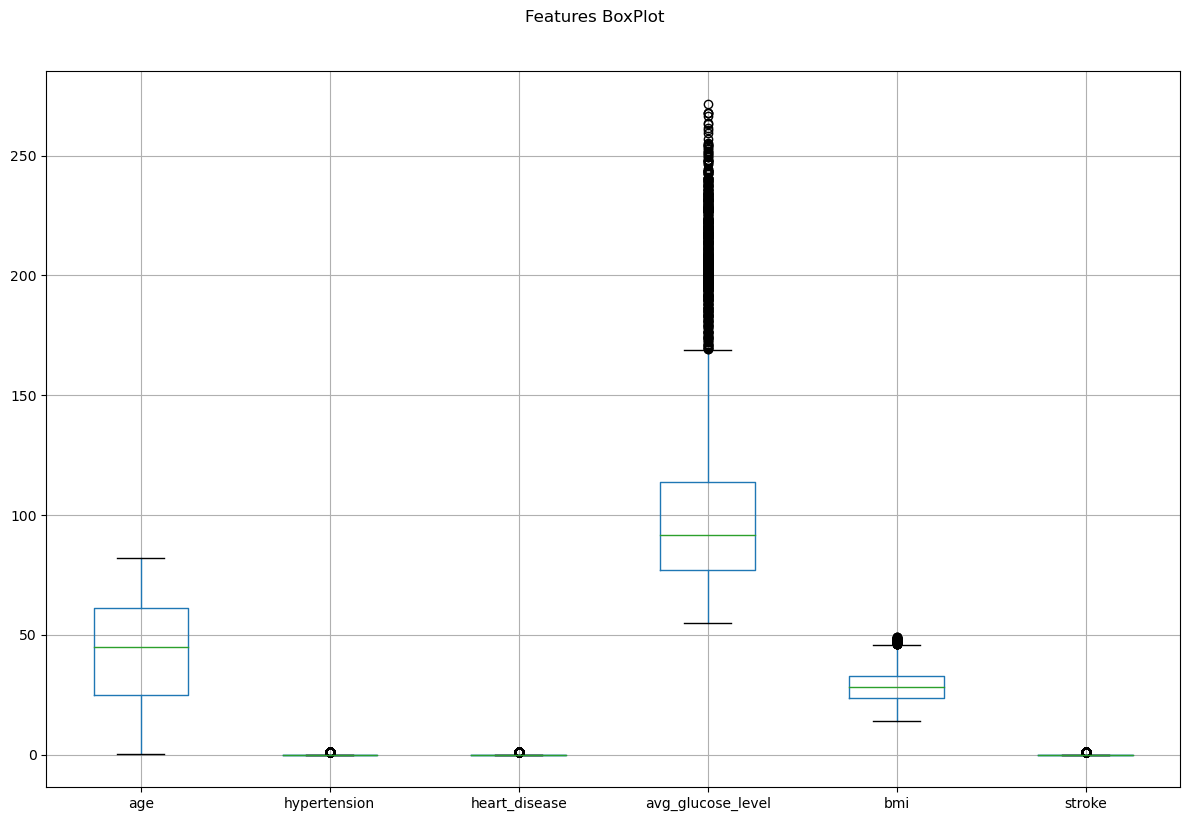

In [14]:
df.boxplot(figsize=(12,8))
plt.suptitle('Features BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()

([<matplotlib.patches.Wedge at 0x1491df2e2d0>,
 [Text(-0.2856502080988945, 1.0622636012840967, 'Male'),
  Text(0.28565020809889463, -1.0622636012840967, 'Female')],
 [Text(-0.1558092044175788, 0.5794165097913254, '58%'),
  Text(0.15580920441757887, -0.5794165097913254, '42%')])

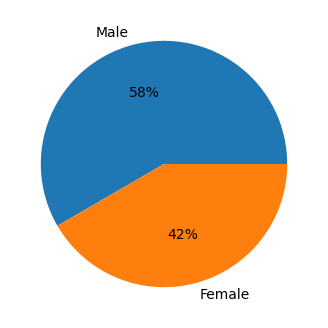

In [15]:
gender= ['Male', 'Female']
gender_data = pd.Series(df['gender']).value_counts()
plt.figure(figsize=(4,4))
plt.pie(gender_data, labels=gender, autopct='%.0f%%')


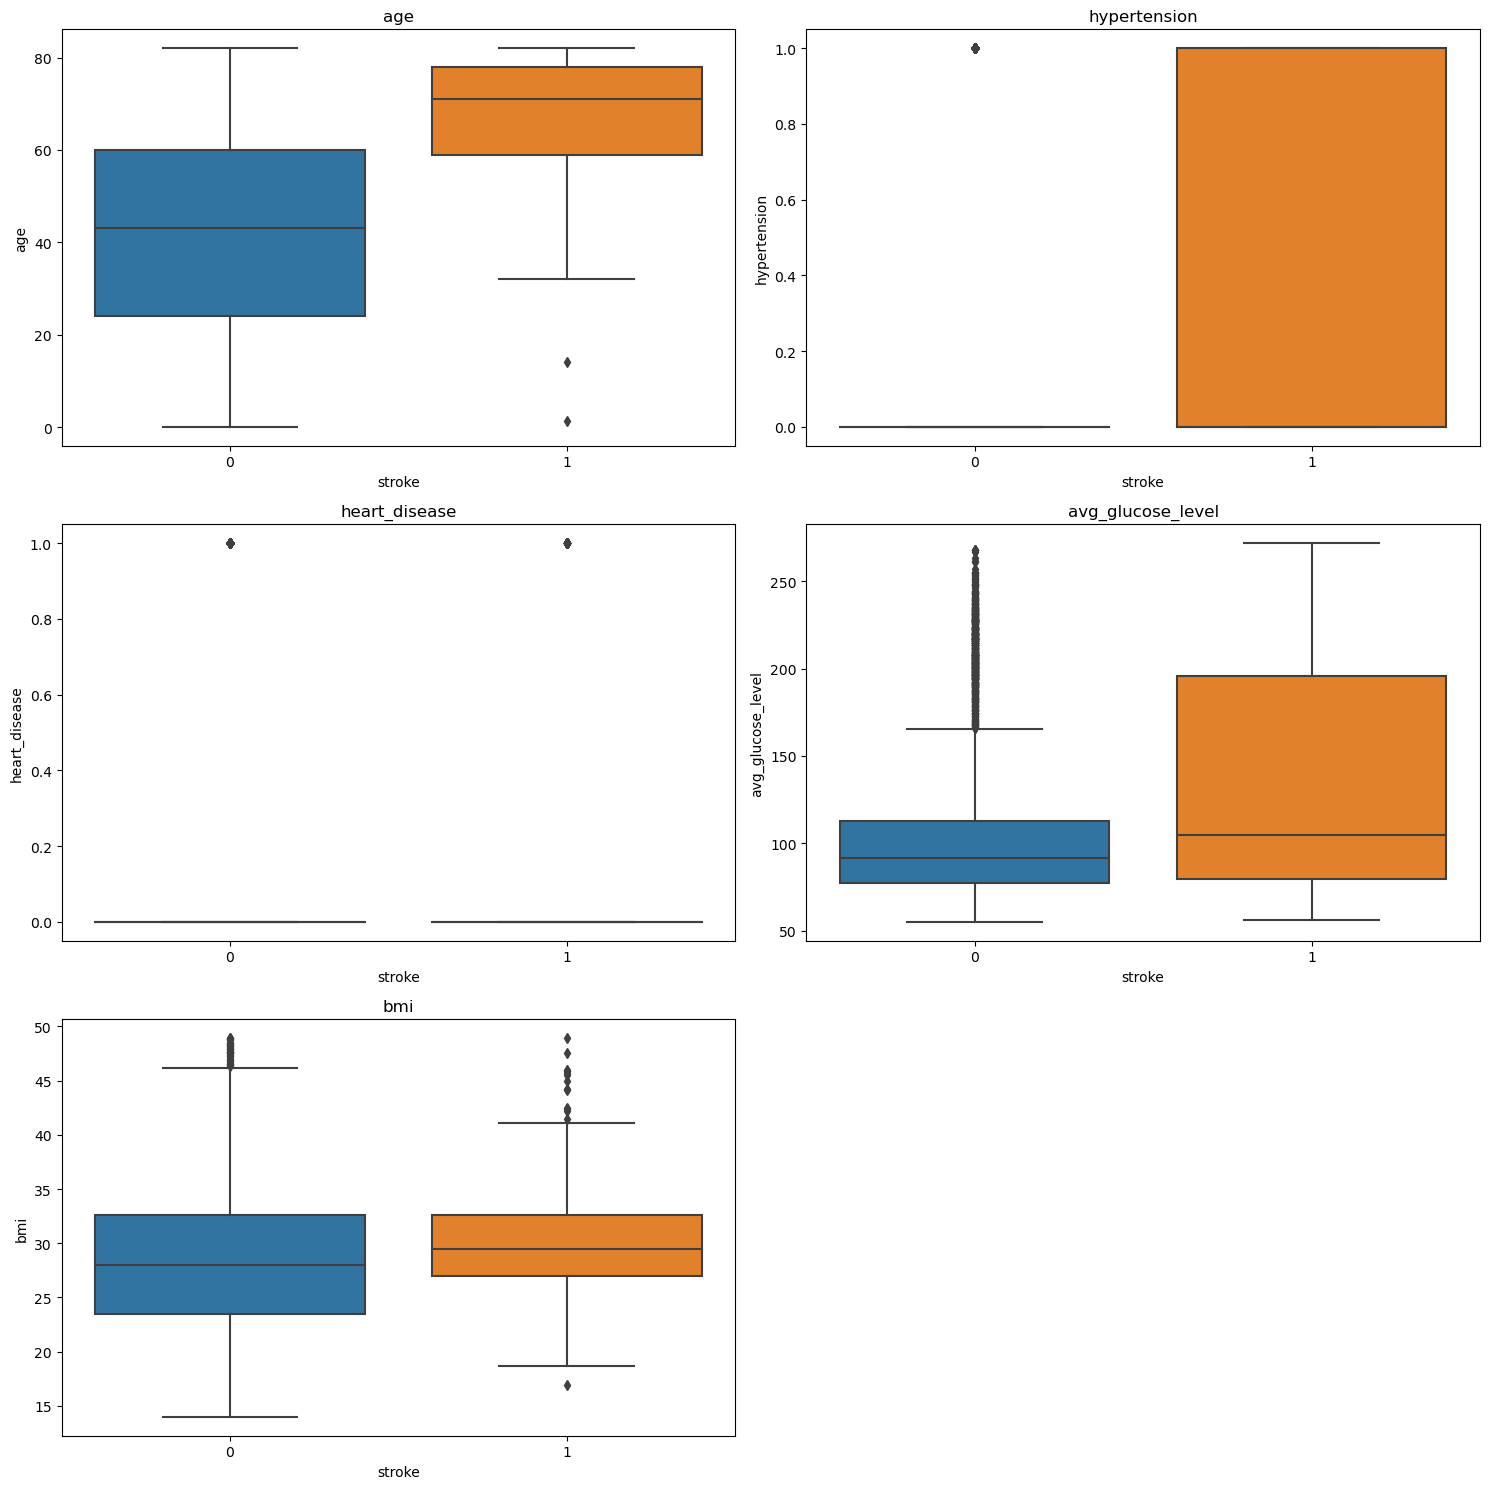

In [17]:
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.boxplot(x=df['stroke'],y=df['age'])
plt.title('age')

plt.subplot(3,2,2)
sns.boxplot(x=df['stroke'],y=df['hypertension'])
plt.title('hypertension')

plt.subplot(3,2,3)
sns.boxplot(x=df['stroke'],y=df['heart_disease'])
plt.title('heart_disease')

plt.subplot(3,2,4)
sns.boxplot(x=df['stroke'],y=df['avg_glucose_level'])
plt.title('avg_glucose_level')

plt.subplot(3,2,5)
sns.boxplot(x=df['stroke'],y=df['bmi'])
plt.title('bmi')

plt.tight_layout()

<Axes: title={'center': 'Heatmap for data '}>

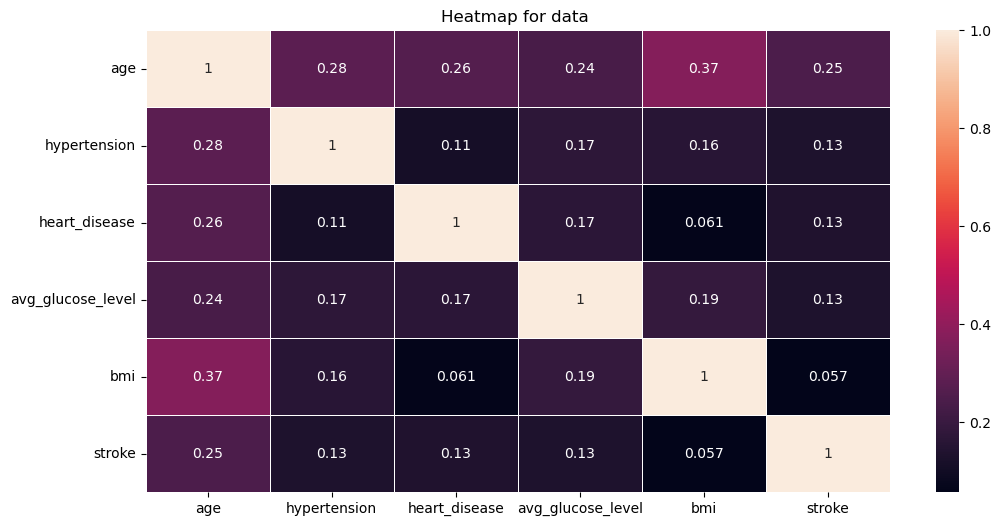

In [21]:
data= df[['age', 'hypertension', 'heart_disease','avg_glucose_level', 'bmi', 'stroke']]
df_corr = data.corr()

plt.figure(figsize=(12,6))

plt.title('Heatmap for data ')
sns.heatmap(df_corr, annot=True, linecolor='white', linewidth=0.4)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB

In [23]:
X = df[['age','hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]

y = df[['stroke']]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=42)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3984, 5), (997, 5), (3984, 1), (997, 1))

In [25]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [26]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9458375125376128


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
new_data = pd.DataFrame({
    'age': [65.0, 11.0, 1.56],
    'hypertension': [1, 0, 0],
    'heart_disease': [0, 0, 0],
    'avg_glucose': [180.76, 93.51, 93.74],
    'bmi': [26.9, 20.8, 20.1]
})

# Make predictions on the new data
new_predictions = model.predict(new_data)

print("Predictions on new data:")
print(new_predictions)


Predictions on new data:
[1 1 1]


D:\Anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have the ground truth for the new data
ground_truth = [0, 0, 0]  # Replace with actual ground truth labels

# Replace new_predictions with the actual predictions made by your model
new_predictions = [1, 1, 1]  # Replace with actual predicted labels

# Calculate metrics for the new predictions
accuracy_new = accuracy_score(ground_truth, new_predictions)
precision_new = precision_score(ground_truth, new_predictions)
recall_new = recall_score(ground_truth, new_predictions)
f1_new = f1_score(ground_truth, new_predictions)

print(f"Accuracy on new data: {accuracy_new}")
print(f"Precision on new data: {precision_new}")
print(f"Recall on new data: {recall_new}")
print(f"F1 Score on new data: {f1_new}")

Accuracy on new data: 0.0
Precision on new data: 0.0
Recall on new data: 0.0
F1 Score on new data: 0.0


D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn.metrics import classification_report, confusion_matrix
model.fit(X_train,y_train)

pred = model.predict(X_test)

print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.95      0.92       997



D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being 

Text(0.5, 1.0, 'confusion matrix for logistic regression')

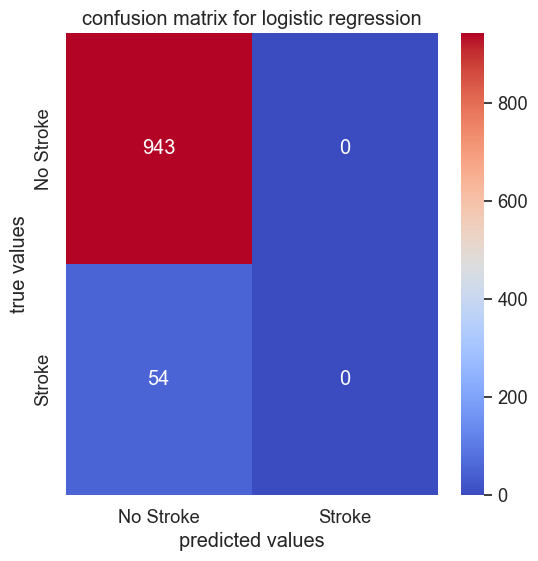

In [31]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6,6))
sns.set(font_scale=1.2)

sns.heatmap(cm, annot=True, fmt='d',cmap='coolwarm', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'] )

plt.xlabel('predicted values')
plt.ylabel('true values')
plt.title('confusion matrix for logistic regression')

In [32]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9137412236710131


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

new_data = pd.DataFrame({
    'age': [65.0, 11.0, 1.56],
    'hypertension': [1, 0, 0],
    'heart_disease': [0, 0, 0],
    'avg_glucose': [180.76, 93.51, 93.74],
    'bmi': [26.9, 20.8, 20.1]
})


new_predictions = model.predict(new_data)

print("Predictions on new data:")
print(new_predictions)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


ground_truth = [0, 0, 0]  

new_predictions = [1, 1, 1]  


accuracy_new = accuracy_score(ground_truth, new_predictions)
precision_new = precision_score(ground_truth, new_predictions)
recall_new = recall_score(ground_truth, new_predictions)
f1_new = f1_score(ground_truth, new_predictions)

print(f"Accuracy on new data: {accuracy_new}")
print(f"Precision on new data: {precision_new}")
print(f"Recall on new data: {recall_new}")
print(f"F1 Score on new data: {f1_new}")

Predictions on new data:
[0 0 0]
Accuracy on new data: 0.0
Precision on new data: 0.0
Recall on new data: 0.0
F1 Score on new data: 0.0


D:\Anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

D:\Anaconda\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9418254764292878


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

new_data = pd.DataFrame({
    'age': [65.0, 11.0, 1.56],
    'hypertension': [1, 0, 0],
    'heart_disease': [0, 0, 0],
    'avg_glucose': [180.76, 93.51, 93.74],
    'bmi': [26.9, 20.8, 20.1]
})


new_predictions = model.predict(new_data)

print("Predictions on new data:")
print(new_predictions)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


ground_truth = [0, 0, 0]  

new_predictions = [1, 1, 1]  


accuracy_new = accuracy_score(ground_truth, new_predictions)
precision_new = precision_score(ground_truth, new_predictions)
recall_new = recall_score(ground_truth, new_predictions)
f1_new = f1_score(ground_truth, new_predictions)

print(f"Accuracy on new data: {accuracy_new}")
print(f"Precision on new data: {precision_new}")
print(f"Recall on new data: {recall_new}")
print(f"F1 Score on new data: {f1_new}")

Predictions on new data:
[0 0 0]
Accuracy on new data: 0.0
Precision on new data: 0.0
Recall on new data: 0.0
F1 Score on new data: 0.0


D:\Anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
model = SVC()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9458375125376128


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

new_data = pd.DataFrame({
    'age': [65.0, 11.0, 1.56],
    'hypertension': [1, 0, 0],
    'heart_disease': [0, 0, 0],
    'avg_glucose': [180.76, 93.51, 93.74],
    'bmi': [26.9, 20.8, 20.1]
})


new_predictions = model.predict(new_data)

print("Predictions on new data:")
print(new_predictions)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


ground_truth = [0, 0, 0]  

new_predictions = [1, 1, 1]  


accuracy_new = accuracy_score(ground_truth, new_predictions)
precision_new = precision_score(ground_truth, new_predictions)
recall_new = recall_score(ground_truth, new_predictions)
f1_new = f1_score(ground_truth, new_predictions)

print(f"Accuracy on new data: {accuracy_new}")
print(f"Precision on new data: {precision_new}")
print(f"Recall on new data: {recall_new}")
print(f"F1 Score on new data: {f1_new}")

Predictions on new data:
[0 0 0]
Accuracy on new data: 0.0
Precision on new data: 0.0
Recall on new data: 0.0
F1 Score on new data: 0.0


D:\Anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9418254764292878


D:\Anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

new_data = pd.DataFrame({
    'age': [65.0, 11.0, 1.56],
    'hypertension': [1, 0, 0],
    'heart_disease': [0, 0, 0],
    'avg_glucose': [180.76, 93.51, 93.74],
    'bmi': [26.9, 20.8, 20.1]
})


new_predictions = model.predict(new_data)

print("Predictions on new data:")
print(new_predictions)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


ground_truth = [0, 0, 0]  

new_predictions = [1, 1, 1]  


accuracy_new = accuracy_score(ground_truth, new_predictions)
precision_new = precision_score(ground_truth, new_predictions)
recall_new = recall_score(ground_truth, new_predictions)
f1_new = f1_score(ground_truth, new_predictions)

print(f"Accuracy on new data: {accuracy_new}")
print(f"Precision on new data: {precision_new}")
print(f"Recall on new data: {recall_new}")
print(f"F1 Score on new data: {f1_new}")

Predictions on new data:
[0 0 0]
Accuracy on new data: 0.0
Precision on new data: 0.0
Recall on new data: 0.0
F1 Score on new data: 0.0


D:\Anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
model = CategoricalNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9488465396188566


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Assuming you have X and y, your feature matrix and target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (you might need to customize preprocessing based on your data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a simple neural network model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=1  , activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for 50 epochs
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the test set
predictions = model.predict_classes(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Optionally, you can plot the training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/50
125/125 [==============================] - 3s 5ms/step - loss: 0.4555 - accuracy: 0.8579 - val_loss: 0.2759 - val_accuracy: 0.9458
Epoch 2/50
125/125 [==============================] - 0s 2ms/step - loss: 0.2155 - accuracy: 0.9513 - val_loss: 0.2028 - val_accuracy: 0.9458
Epoch 3/50
125/125 [==============================] - 0s 3ms/step - loss: 0.1772 - accuracy: 0.9513 - val_loss: 0.1871 - val_accuracy: 0.9458
Epoch 4/50
125/125 [==============================] - 0s 3ms/step - loss: 0.1668 - accuracy: 0.9513 - val_loss: 0.1820 - val_accuracy: 0.9458
Epoch 5/50
125/125 [==============================] - 0s 3ms/step - loss: 0.1622 - accuracy: 0.9513 - val_loss: 0.1804 - val_accuracy: 0.9458
Epoch 6/50
125/125 [==============================] - 0s 3ms/step - loss: 0.1594 - accuracy: 0.9513 - val_loss: 0.1766 - val_accuracy: 0.9458
Epoch 7/50
125/125 [==============================] - 0s 3ms/step - loss: 0.1579 - accuracy: 0.9513 - val_loss: 0.1753 - val_accuracy: 0.9458
Epoch 

AttributeError: 'Sequential' object has no attribute 'predict_classes'